In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
# import pandas as pd
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arccos,linspace,array,arange,meshgrid,abs

from scipy.integrate import quad,dblquad,tplquad

from random import shuffle, sample, choice
%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\renewcommand{\vec}{\mathbf}$

## Example

Let $C$ be the piece of the parabola $y=(x-1)^2$ from $(0,1)$ to $(3,4)$, and let $f(x,y) = x+y$. 

Compare the line integrals $\int_C f\, dx$, $\int_C f\, dy$, and $\int_C f\, ds$.

In [6]:
# r = lambda t: np.array([t,(t-1)**2])
# f = lambda x,y: x + y
# t = np.linspace(0,3,100)

@interact(angle=(-108,66,6),s=(0.,3,.1))
def _(angle=-24,vangle=(0,90,6),s=0,surf=False,
      r=fixed(lambda t: np.array([t,(t-1)**2])),
      f = fixed(lambda x,y: x + y),
      t = fixed(np.linspace(0,3,100))):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    u = np.linspace(0,3,100) 
    v = np.linspace(0,4,100) 
    w = np.linspace(0,s,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    U,V = np.meshgrid(u,v)
    if surf:
        ax.plot_surface(U,V,f(U,V),alpha=.4)
    ax.plot_surface(*r(w),z*f(*r(w)),color='r',alpha=1)

    ax.plot_surface(r(w)[0,:],0*w ,z*f(*r(w)),color='b',alpha=.5)
    ax.plot_surface(0*w ,r(w)[1,:],z*f(*r(w)),color='g',alpha=.5)
    ax.plot(*r(t),np.zeros_like(t),'-r')
    ax.view_init(vangle,angle)

    ax.set_xlim([0,4])
    ax.set_ylim([0,4])
    ax.set_zlim([0,8])
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

# Work

$$\text{work} = \text{force}\times \text{distance} $$

but what if the force (or the distance) is changing continuously?

#### Hooke's Law

A spring with constant $k$ compresses from 7 cm to 4 cm (past equilibrium). How much work was done by the spring?

#### Rolling down a ramp. 

A ball falls down a parabolic ramp $y=x^2$ from $(-2,4)$ to the origin. How much work was done by gravity?

### Exercise

![Line integral of vector field example from Stewart](../img/stew-lineintex.png)

## Example

Compute $\int_C \vec F \cdot d\vec r$ for the two paths below from $(2,0)$ to $(-\sqrt{2},\sqrt{2})$ in the field $\langle -y,x \rangle$. Try to predict which is greater before you start.

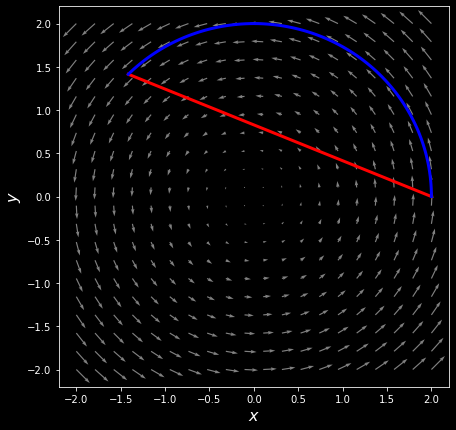

In [10]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,-y,x,color='gray');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
# plt.arrow(0,2*sqrt(2)/(2+sqrt(2)),1/2,1/2)
plt.plot(2*cos(t*3*pi/4),2*sin(t*3*pi/4),'b',lw=3);

# Example

Which of the following fields is conservative?

  1. $x\,\vec i$
  1. $x\,\vec j$
  1. Both.
  1. Neither.

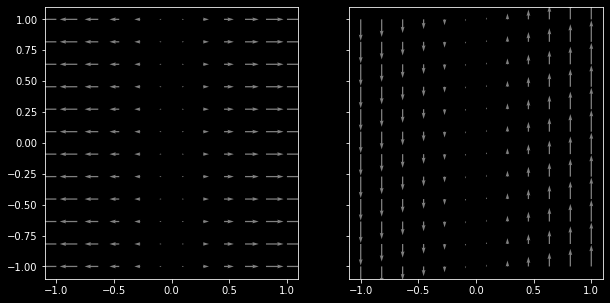

In [12]:
x = y = linspace(-1,1,12)
x,y = meshgrid(x,y)
fig, axs=plt.subplots(1,2,figsize=(10,5),sharey=True)
axs[0].quiver(x,y,x,0,color='gray')
axs[1].quiver(x,y,0,x,color='gray');